In [297]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [299]:
data = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [300]:
data = data.iloc[:, 1:]
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [301]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [302]:
num = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
cat = ['cut', 'color', 'clarity']

In [303]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [304]:
data.duplicated().sum()


146

In [305]:
data.drop_duplicates(inplace=True)

In [306]:
data.duplicated().sum()

0

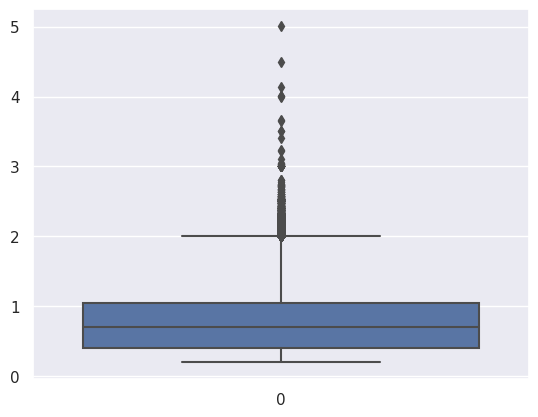

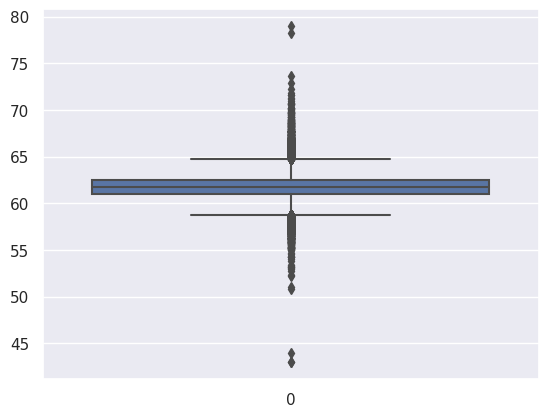

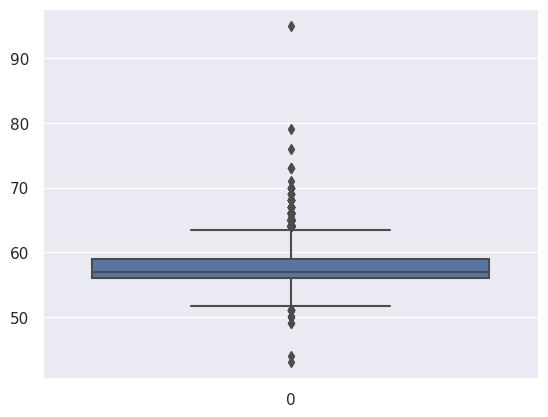

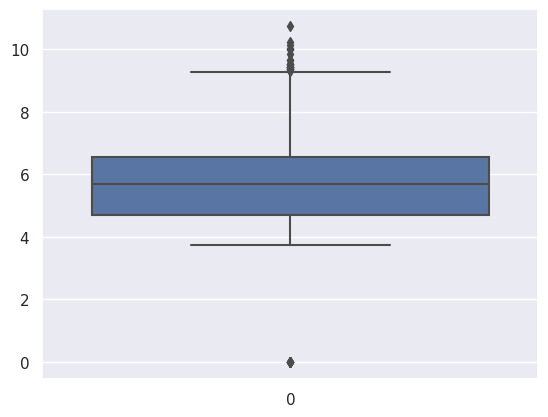

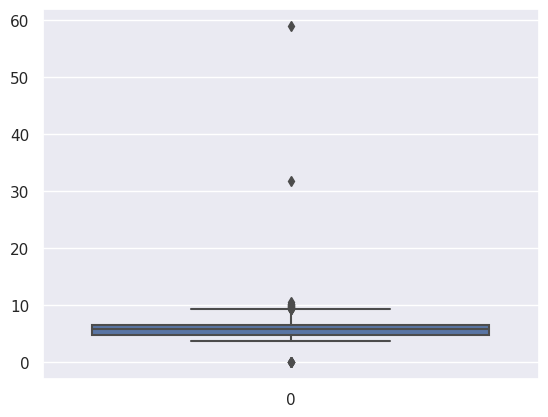

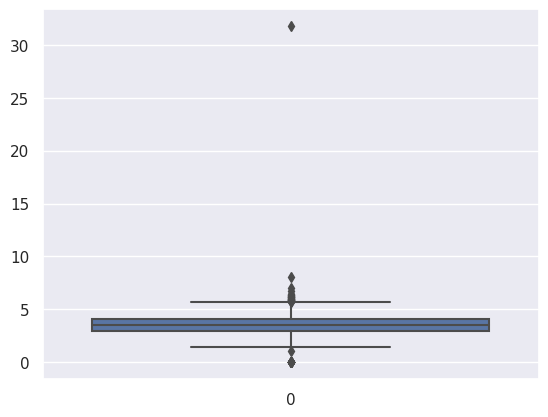

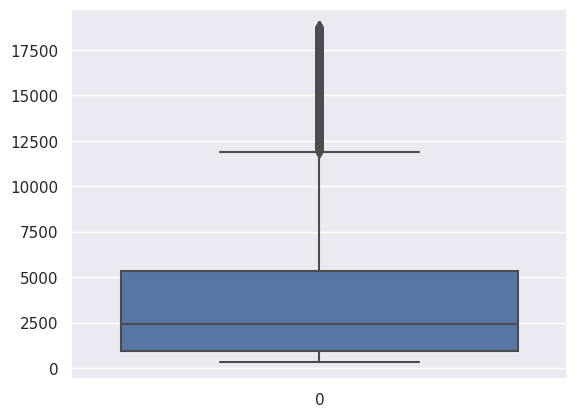

In [307]:
for x in num:
    plt.figure()
    sns.boxplot(data[x])
    plt.show()

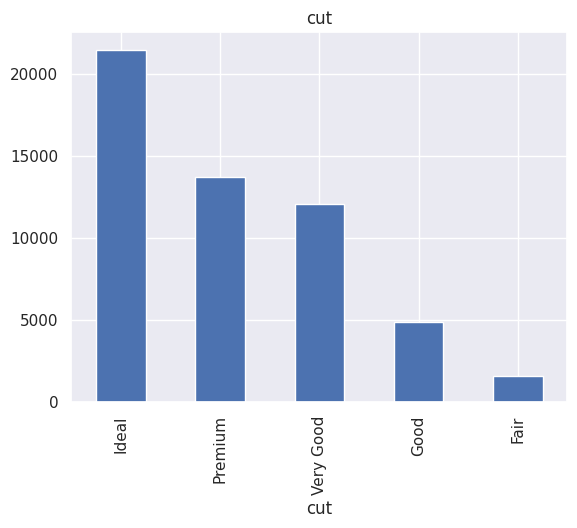

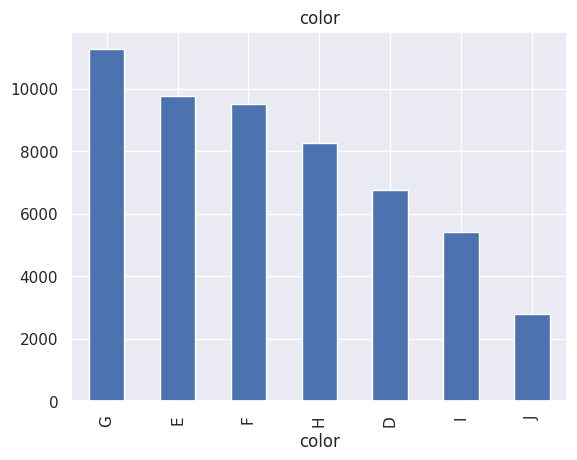

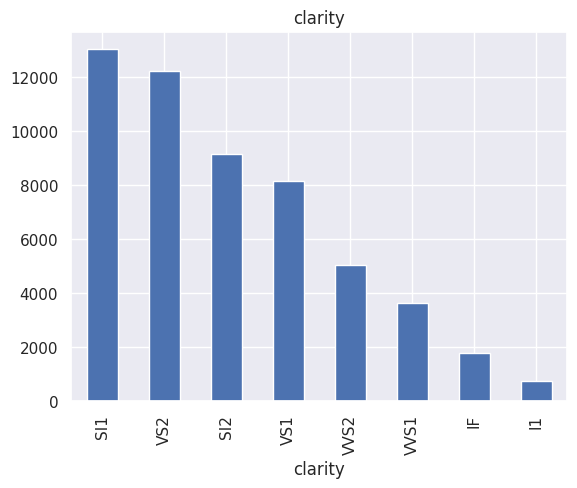

In [308]:
for col in cat:
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

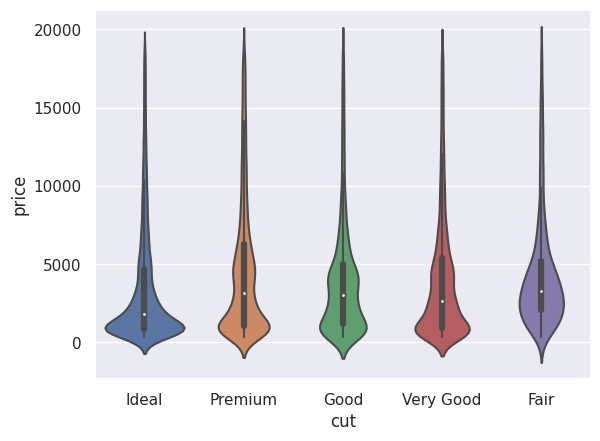

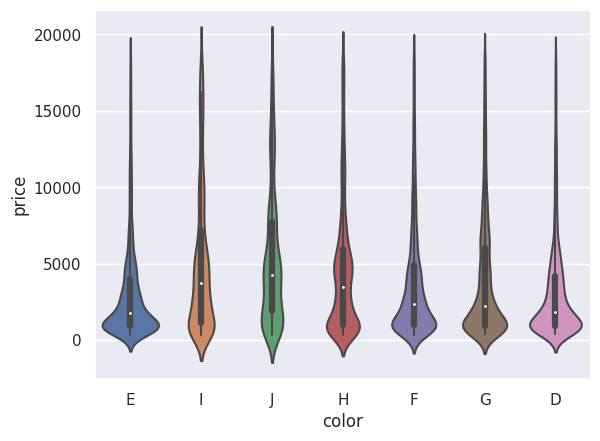

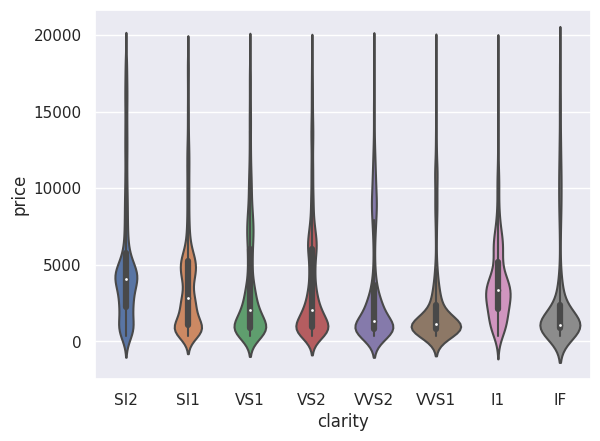

In [309]:
for x in cat:
    sns.violinplot(x=x, y='price', data=data)
    plt.show()

In [310]:
data.groupby('cut')['price'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
cut,,,,
Fair,337,18574,4341.954318,3282.0
Good,327,18788,3919.121039,3042.0
Ideal,326,18806,3462.749953,1813.0
Premium,326,18823,4583.501891,3182.0
Very Good,336,18818,3981.016157,2647.0


# why is ideal cut so cheap 💀

In [311]:
data.groupby('color')['price'].agg(['min', 'max', 'mean', 'median'])


,min,max,mean,median
color,,,,
D,357,18693,3174.441007,1842.0
E,326,18731,3079.608020,1741.5
F,342,18791,3726.749580,2345.0
G,354,18818,4001.352069,2246.0
H,337,18803,4482.855174,3452.5
I,334,18823,5081.751248,3720.0
J,335,18710,5326.415418,4234.5


In [312]:
data.groupby('clarity')['price'].agg(['min', 'max', 'mean', 'median'])


,min,max,mean,median
clarity,,,,
I1,345,18531,3925.275676,3346.0
IF,369,18806,2870.569507,1080.0
SI1,326,18818,3996.165132,2822.0
SI2,326,18804,5057.455410,4071.5
VS1,327,18795,3841.611329,2010.0
VS2,334,18823,3927.741516,2061.0
VVS1,336,18777,2526.602961,1094.0
VVS2,336,18768,3286.532437,1316.0


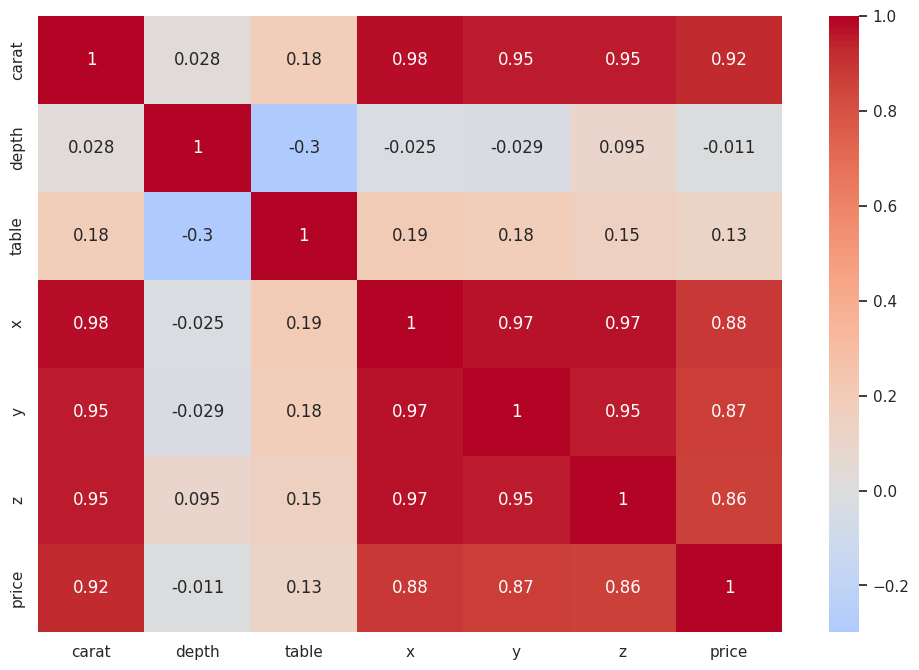

In [313]:
corr = data[num].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

## x, y, z are highly correlated with carat, I will drop to avoid multicolinearity

In [314]:
data.drop(['x', 'y', 'z'], axis = 1, inplace = True)
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [315]:
#COLOR -> D, E, F, G, H, I, J 
#CUT -> air, Good, Very Good, Premium, Ideal 
# CLARITY -> (I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

color_map = {'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6}
cut_map = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
clarity_map = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}

data['color'] = data['color'].map(color_map)
data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)

In [316]:
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,4,1,1,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,3,62.4,58.0,334
4,0.31,1,6,1,63.3,58.0,335


In [317]:
z = data.copy()
num = ['carat', 'depth', 'table', 'price']
for x in num:
    z[x] = np.abs((data[x] - data[x].mean())/data[x].std())

outliers = data[(z['carat'] > 3)| (z['depth'] > 3) | (z['table'] > 3) | (z['price'] > 3)]
outliers.shape

(2319, 7)

In [318]:
data.shape

(53794, 7)

In [319]:
data = data[(z['carat'] <= 3)& (z['depth'] <= 3) & (z['table'] <= 3) & (z['price'] <= 3)]
data.shape

(51475, 7)

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'color'}>],
       [<Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

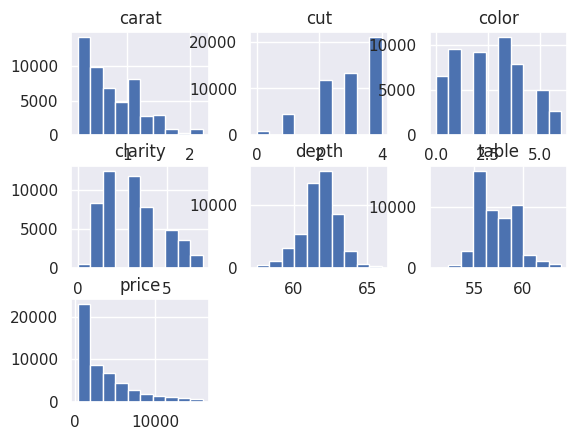

In [320]:
data.hist()

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x = data.drop(columns = ['price'])
# x = data['carat']
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# x_train_scaled  = x_train
# x_test_scaled = x_test


In [322]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [323]:
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Ridge
ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge.fit(x_train_scaled, y_train)

# Lasso
lasso = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='r2')
lasso.fit(x_train_scaled, y_train)

# ElasticNet
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elastic = GridSearchCV(ElasticNet(max_iter=10000), elastic_param_grid, cv=5, scoring='r2')
elastic.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='r2')

In [328]:
from sklearn.metrics import mean_squared_error, r2_score
def eval(name, model, x_test, y_test):
    y_pred = np.maximum(model.predict(x_test_scaled), 0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = x_test.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    print(f" Model : {name}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  R² Adjusted: {r2_adj:.4f}\n")

In [329]:
models = {
    'Linear' : lr,
    'Ridge' : ridge, 
    'Lasso' : lasso,
    'Elastic' : elastic
}

for name, model in models.items():
    eval(name, model, x_test_scaled, y_test)

 Model : Linear
  MSE: 953450.44
  RMSE: 976.45
  R² Score: 0.9182
  R² Adjusted: 0.9181

 Model : Ridge
  MSE: 953490.18
  RMSE: 976.47
  R² Score: 0.9182
  R² Adjusted: 0.9181

 Model : Lasso
  MSE: 953528.94
  RMSE: 976.49
  R² Score: 0.9182
  R² Adjusted: 0.9181

 Model : Elastic
  MSE: 956767.96
  RMSE: 978.15
  R² Score: 0.9179
  R² Adjusted: 0.9179



# Lasso Regression did best results are not far from linear regression tho, i think Lasso filtered all features except caret , while linear regression gave them very small parameters sooo


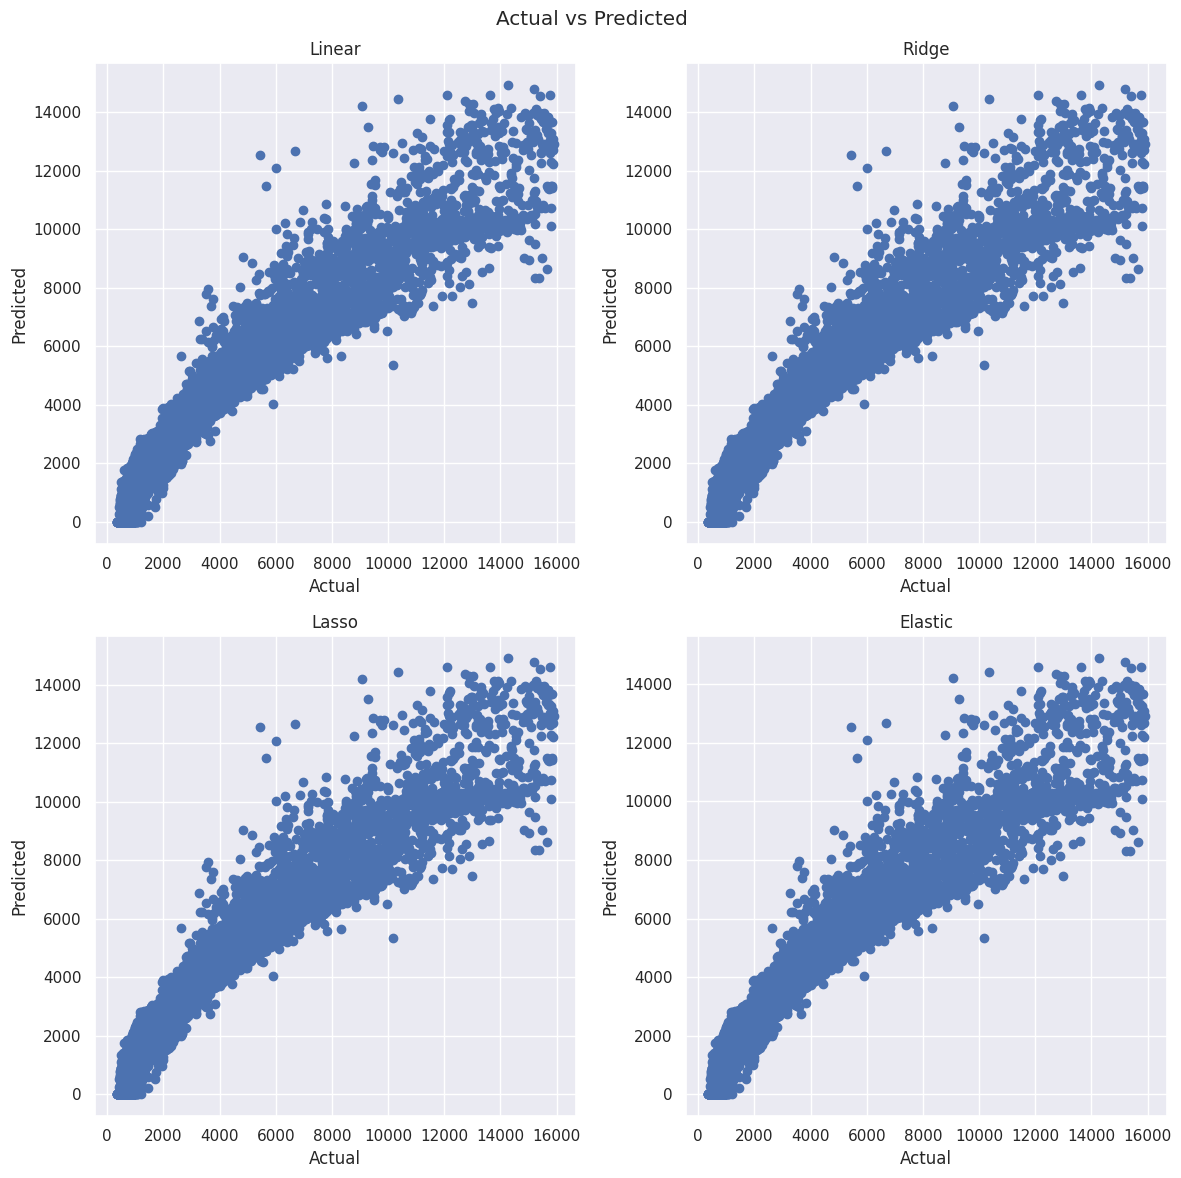

In [327]:
plt.figure(figsize=(12, 12))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    # y_pred = model.predict(x_test_scaled)
    y_pred = np.maximum(model.predict(x_test_scaled), 0)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)

plt.suptitle("Actual vs Predicted")
plt.tight_layout()
plt.show()

# why does the model has negatives lol 💀

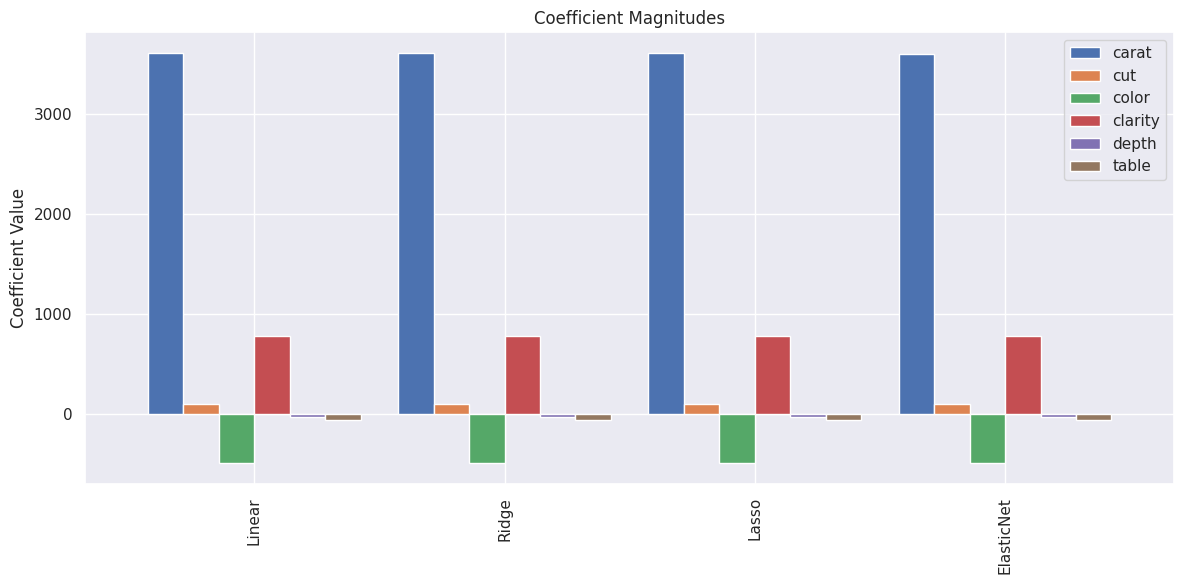

In [331]:
feature_names = x.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear': lr.coef_,
    'Ridge': ridge.best_estimator_.coef_,
    'Lasso': lasso.best_estimator_.coef_,
    'ElasticNet': elastic.best_estimator_.coef_,
})

coef_df.set_index('Feature').T.plot(kind='bar', figsize=(12, 6), width=0.85)
plt.title("Coefficient Magnitudes")
plt.ylabel("Coefficient Value")
plt.legend()
plt.tight_layout()
plt.show()


In [334]:
lasso_zero = coef_df[coef_df['Lasso'] == 0]['Feature'].tolist()
elastic_zero = coef_df[coef_df['ElasticNet'] == 0]['Feature'].tolist()

print("ZERO Lasso:", lasso_zero)
print("ZERO ElasticNet:", elastic_zero)


ZERO Lasso: []
ZERO ElasticNet: []
